In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
from scipy import stats
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv("C:/Users/Shahbaz Baig/Desktop/Titanic-Dataset.csv" , usecols=['Survived' , 'Fare' , 'Age'])

In [4]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [5]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [6]:
df['Age'].fillna(df['Age'].mean(),inplace = True)

C:\Users\Shahbaz Baig\AppData\Local\Temp\ipykernel_14812\1652017284.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace = True)


In [7]:
df['Age'].isnull().sum()

0

In [8]:
x = df.iloc[:,1:]
y = df['Survived']

In [9]:
x_train , x_test , y_train , y_test = train_test_split(x,y,random_state = 72 , test_size = 0.2)

In [10]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [11]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

C:\Users\Shahbaz Baig\AppData\Local\Temp\ipykernel_14812\2919112370.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'])


Text(0.5, 1.0, 'QQ plot')

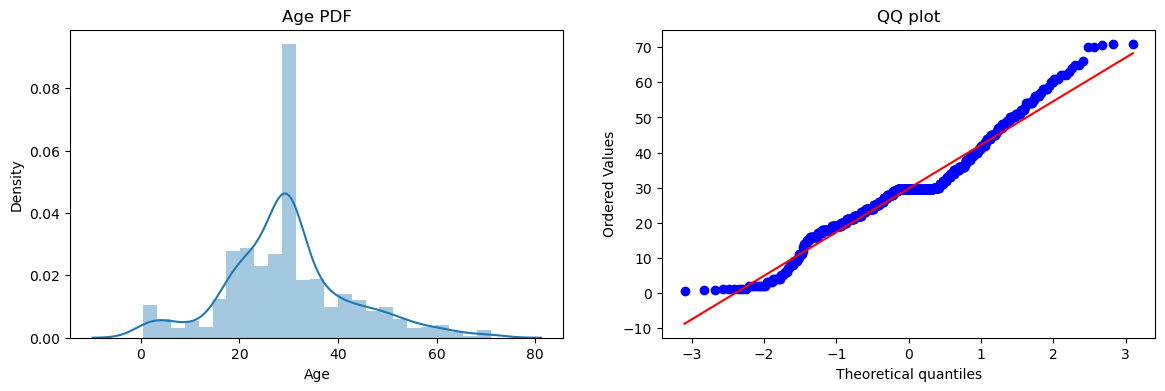

In [12]:
plt.figure(figsize=(14,4))
plt.subplot(121)   # 1 -> rows 2 -> columns 3 -> position (as indexing in matplotlib starts from 1 not from 0)
sns.distplot(x_train['Age'])
plt.title("Age PDF")   # it is somewhat normal distribution 


# plt.figure(figsize=(14,4))
plt.subplot(122)   # 1 -> rows 2 -> columns 3 -> position (as indexing in matplotlib starts from 1 not from 0)
stats.probplot(x_train['Age'], dist = 'norm', plot = plt)
plt.title("QQ plot")   # it is somewhat normal distribution 



C:\Users\Shahbaz Baig\AppData\Local\Temp\ipykernel_14812\3243716708.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Fare'])


Text(0.5, 1.0, 'QQ plot')

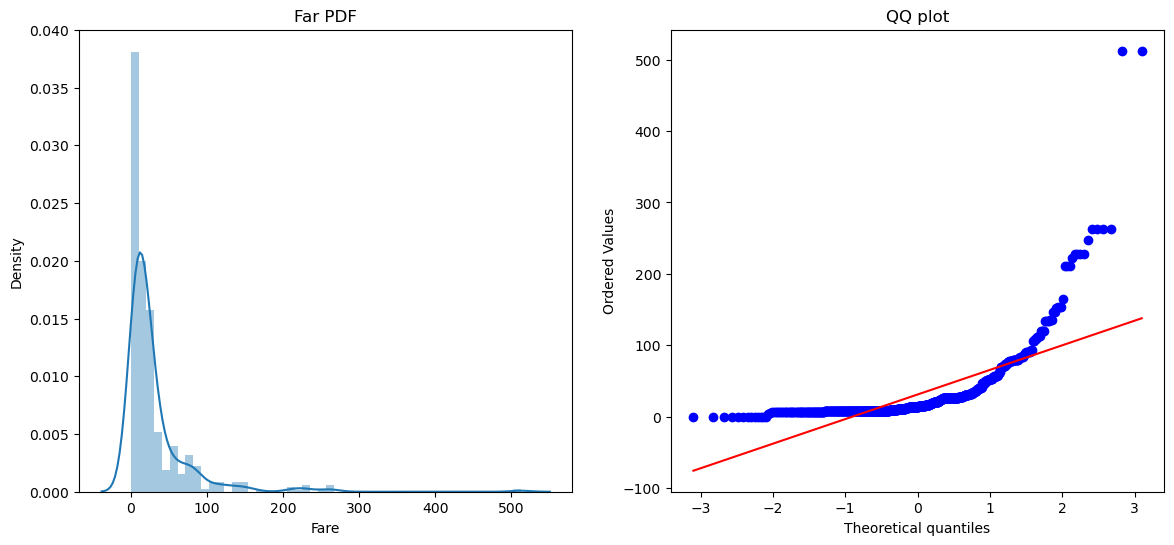

In [41]:
plt.figure(figsize=(14,6))
plt.subplot(121)   # 1 -> rows 2 -> columns 3 -> position (as indexing in matplotlib starts from 1 not from 0)
sns.distplot(x_train['Fare'])
plt.title("Far PDF")   # it is somewhat normal distribution 


# plt.figure(figsize=(14,4))
plt.subplot(122)   # 1 -> rows 2 -> columns 3 -> position (as indexing in matplotlib starts from 1 not from 0)
stats.probplot(x_train['Fare'], dist = 'norm', plot = plt)
plt.title("QQ plot")   # it is somewhat normal distribution 



In [14]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()
x_train

,Age,Fare
292,36.000000,12.8750
674,29.699118,0.0000
121,29.699118,8.0500
6,54.000000,51.8625
780,13.000000,7.2292
...,...,...
869,4.000000,11.1333
74,32.000000,56.4958
46,29.699118,15.5000
787,8.000000,29.1250


In [15]:
clf.fit(x_train,y_train)
clf2.fit(x_train,y_train)

y_pred = clf.predict(x_test)
y_pred2 = clf2.predict(x_test)

acc = accuracy_score(y_pred,y_test)
acc2 = accuracy_score(y_pred2,y_test)

print('accuracy of LREG ->',acc)
print('accuracy of DTREE ->',acc2)

accuracy of LREG -> 0.6480446927374302
accuracy of DTREE -> 0.6759776536312849


In [16]:
trf = FunctionTransformer(func= np.log1p)

In [17]:
x_train_tr = trf.fit_transform(x_train)
x_test_tr = trf.transform(x_test)

In [18]:
clf.fit(x_train_tr,y_train)
clf2.fit(x_train_tr,y_train)

y_pred = clf.predict(x_test_tr)
y_pred2 = clf2.predict(x_test_tr)

acc_tr = accuracy_score(y_pred,y_test)
acc2_tr= accuracy_score(y_pred2,y_test)

print('accuracy of LREG ->',acc_tr)    # tremendous increase in accuracy of the model
print('accuracy of DTREE ->',acc2_tr)

accuracy of LREG -> 0.6815642458100558
accuracy of DTREE -> 0.664804469273743


In [19]:
x_transformed = trf.fit_transform(x)

print('LR',np.mean(cross_val_score(clf,x_transformed,y,scoring= 'accuracy' , cv = 10)))
print('TREE',np.mean(cross_val_score(clf2,x_transformed,y,scoring= 'accuracy' , cv = 10)))  # cross Validation 

LR 0.678027465667915
TREE 0.6577528089887641


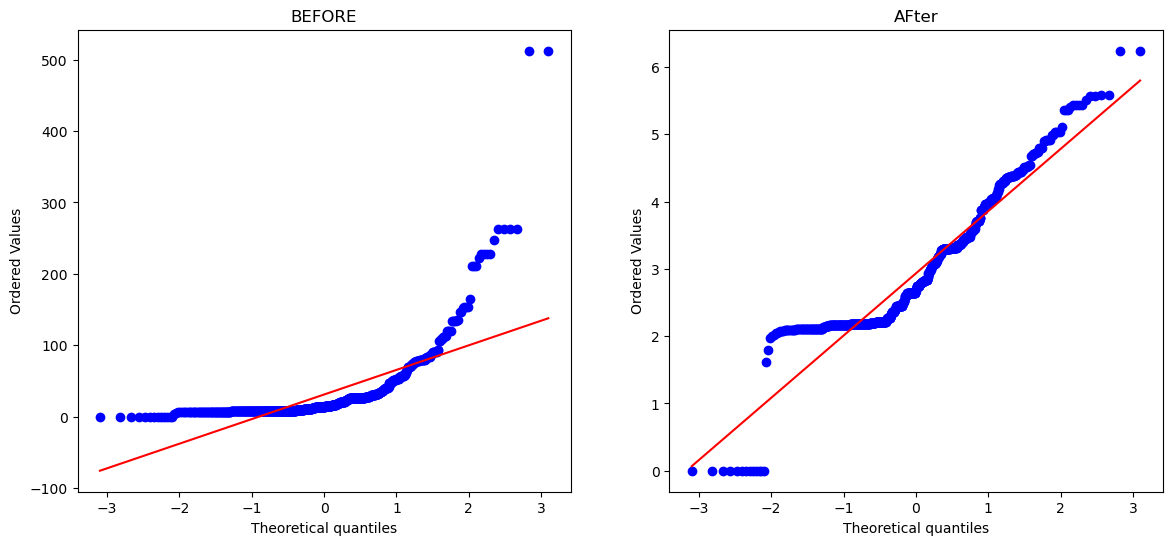

In [20]:
plt.figure(figsize=(14,6))
plt.subplot(121)
stats.probplot(x_train['Fare'],dist = 'norm' , plot = plt)
plt.title("BEFORE")

plt.subplot(122)
stats.probplot(x_train_tr['Fare'],dist = 'norm' , plot = plt)
plt.title("AFter")

plt.show()

In [43]:
df

,Survived,Age,Fare
0,0,22.000000,7.2500
1,1,38.000000,71.2833
2,1,26.000000,7.9250
3,1,35.000000,53.1000
4,0,35.000000,8.0500
...,...,...,...
886,0,27.000000,13.0000
887,1,19.000000,30.0000
888,0,29.699118,23.4500
889,1,26.000000,30.0000


In [58]:
def apply_transform(transform):
    x = df.iloc[:,1:]
    y = df['Survived']
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    x_trans = trf.fit_transform(x)
    clf = LogisticRegression()
    print("Accuracy = ",np.mean(cross_val_score(clf,x_trans,y,scoring = 'accuracy' , cv = 10)))

    plt.figure(figsize = (14,6))
    plt.subplot(121)
    stats.probplot(x['Fare'],dist = 'norm' , plot = plt)
    plt.title("Plot before Transformation")
    plt.subplot(122)
    stats.probplot(x_trans[:,0],dist = 'norm' , plot = plt)
    plt.title("Plot after Transformation")
    plt.show()

Accuracy =  0.6431335830212235


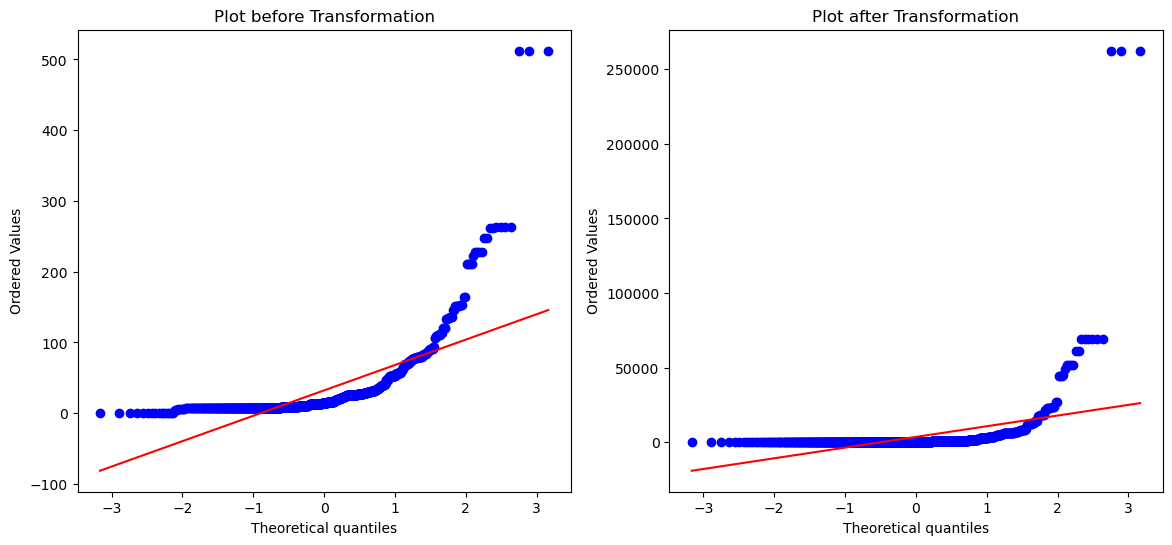

In [68]:
import math as m 
apply_transform(lambda x : np.sq)